In [1]:
import os
import pandas as pd 
import glob
import random 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [42]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',680)

## Determine the number of people with formal loans that also have other loans, and other quesitons regarding numbers of loans per person: 

In [5]:
trx = pd.read_csv('../diaries_transactions_all.csv', low_memory = False)

In [6]:
trx.columns

Index(['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year', 'trx_yr_mo', 'trx_dq_round',
       'trx_stdtime_days_hh', 'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc',
       'trx_stdtime_mnths_acc', 'trx_class_code', 'trx_class_desc',
       'trx_family_code', 'trx_family_desc', 'trx_type_code', 'trx_type_desc',
       'trx_prx_purpose', 'trx_prx_purpose_fd', 'trx_fee',
       'trx_bsheet_direction', 'trx_mode_code', 'trx_mode_desc',
       'trx_place_incommunity', 'trx_distance_km', 'trx_outlet'

### Question 1: How many individuals have any type of loan? 

In [7]:
trx.account_bsheet_desig.value_counts()

Asset        52021
Liability    23078
Insurance     1971
Name: account_bsheet_desig, dtype: int64

In [9]:
liability_trx = trx.loc[trx['account_bsheet_desig'] == "Liability"]
liability_trx.shape

(23078, 58)

In [13]:
len(liability_trx.m_ids_owner.unique())

436

In [21]:
liability_trx.m_ids_owner.value_counts().head()

HH                   1615
63134449728600000     682
57134408247700000     652
61134407559000000     450
59134373356900000     446
Name: m_ids_owner, dtype: int64

In [19]:
liability_trx.loc[liability_trx['unique_hm_owner']==1].shape

(97, 58)

I am confused why the "unique_hm_owner" is 97, while the number of unique values of owners in the liability_trx df is 436; this is a big disparity so I'm not sure which one to use. Let's check it out

### What is the individual loan profile for "63134449728600000", this account owner that has over 682 trxs in the dataset

In [29]:
id_a = '63134449728600000'
trx_id_a = liability_trx.loc[liability_trx['m_ids_owner']==id_a]

In [30]:
trx_id_a.account_ids.value_counts()

63135290342200000    671
63136377011000000     11
Name: account_ids, dtype: int64

In [31]:
loan_1 = '63135290342200000'
trx_loan_1 = liability_trx.loc[liability_trx['account_ids']==loan_1]

In [33]:
trx_loan_1 = trx_loan_1.copy()

In [34]:
trx_loan_1.sort_values("trx_stdtime_days_acc", inplace=True)

In [35]:
for index, row in trx_loan_1.iterrows():
    if trx_loan_1.loc[index,"trx_bsheet_direction"]=="Increase":
        trx_loan_1.at[index,"trx_val_dir"] = trx_loan_1.loc[index,"trx_value_kes"]
    elif trx_loan_1.loc[index,"trx_bsheet_direction"]=="Decrease":
        trx_loan_1.at[index,"trx_val_dir"] = -trx_loan_1.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index7421


In [37]:
trx_loan_1.insert(59,"bal_evol",np.zeros(trx_loan_1.shape[0]))

In [38]:
s=0
for index,row in trx_loan_1.iterrows():
    s+=trx_loan_1.loc[index,"trx_val_dir"]
    trx_loan_1.at[index,"bal_evol"]=s

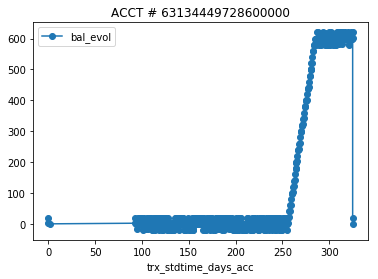

In [44]:
trx_loan_1.plot(x="trx_stdtime_days_acc",y="bal_evol", marker = "o")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)

In [84]:
# trx_loan_1[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

### What is the individual loan profile for "57134408247700000", this account owner that has over 652 trxs in the dataset

In [70]:
id_b = '57134408247700000'
trx_id_b = liability_trx.loc[liability_trx['m_ids_owner']==id_b]

In [72]:
loan_2 = '57136612748000000'
trx_loan_2 = liability_trx.loc[liability_trx['account_ids']==loan_2]

In [73]:
trx_loan_2 = trx_loan_2.copy()

In [85]:
# trx_loan_2.head()

In [76]:
trx_loan_2.sort_values("trx_stdtime_days_acc", inplace=True)

In [77]:
for index, row in trx_loan_2.iterrows():
    if trx_loan_2.loc[index,"trx_bsheet_direction"]=="Increase":
        trx_loan_2.at[index,"trx_val_dir"] = trx_loan_2.loc[index,"trx_value_kes"]
    elif trx_loan_2.loc[index,"trx_bsheet_direction"]=="Decrease":
        trx_loan_2.at[index,"trx_val_dir"] = -trx_loan_2.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index1860


In [78]:
trx_loan_2.insert(trx_loan_2.shape[1],"bal_evol",np.zeros(trx_loan_2.shape[0]))

In [80]:
s=0
for index,row in trx_loan_2.iterrows():
    s+=trx_loan_2.loc[index,"trx_val_dir"]
    trx_loan_2.at[index,"bal_evol"]=s

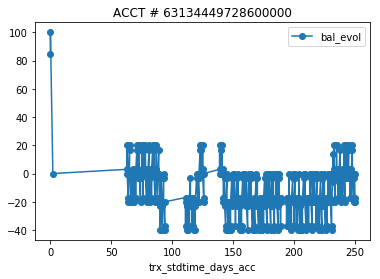

In [81]:
trx_loan_2.plot(x="trx_stdtime_days_acc",y="bal_evol", marker = "o")
plt.title( 'ACCT # '+str(a))
plt_name = 'acct_'+str(a)+'_graph.png'
plt.savefig(plt_name)

In [83]:
# trx_loan_2[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

### Conclusions from this section: 

It appears that these accounts are supplier credits. We should get rid of all with "unexplained balance adjustments" though; let's see what happens when we do that, and how many loans are left: 

## Removing those w/ unexplained balance adjustments & seeing how many loans we are left with, and if this is feasible: 

In [88]:
liability_trx.trx_prx_purpose.value_counts()

2. New purchases on credit                      9862
3. Payments                                     4353
7. Closing Balance--End of last DQ              1190
2. New borrowing                                1040
Fee for using service (10% of repayment)         980
New airtime on credit/new borrowing              978
Repayment of outstanding credit w top up         934
1. Starting balance (today)                      629
2. New purchase on credit                        595
3. Paying off debts                              356
5. Interest accruing                             343
2. New debt                                      297
5. Closing Balance--End of last DQ               238
6. Closing Balance--End of last DQ               225
2. Accepting new deposits                        207
1. Starting balance                              151
3. Providing withdrawals                         123
INCREASE--Unexplained balance adjustment         101
DECREASE--Unexplained balance adjustment      

In [104]:
increase_idxs = [idx for idx, purpose in enumerate(list(liability_trx['trx_prx_purpose'])) if 'INCREASE' in purpose]
decrease_idxs = [idx for idx, purpose in enumerate(list(liability_trx['trx_prx_purpose'])) if 'DECREASE' in purpose]
unexplained_idxs = [idx for idx, purpose in enumerate(list(liability_trx['trx_prx_purpose'])) if "Unexplained" in purpose]

In [106]:
set(unexplained_idxs) == set(increase_idxs+decrease_idxs)

True

In [113]:
accts_with_unexplained_balance_adjustments = liability_trx.iloc[unexplained_idxs].account_ids

In [114]:
len(accts_with_unexplained_balance_adjustments)

193

In [116]:
len(liability_trx.account_ids.unique())

1909

## We would have to get rid of how many formal loans if we take out those accounts w/ unexplained balance adjustments? 

In [119]:
unique_formal_loans = liability_trx.loc[liability_trx['account_formal']=="Formal"].account_ids.unique()

In [120]:
count = 0
for i in accts_with_unexplained_balance_adjustments: 
    if i in unique_formal_loans: 
        count+=1

In [121]:
count

30

## Ok getting off track. Here is figuring out how many individuals have formal loans, of each different type: 

In [123]:
len(unique_formal_loans)

217

### 217 formal loans exist. Of these, how many individual owners: 

In [125]:
unique_formal_accts_df = liability_trx.loc[liability_trx['account_formal']=="Formal"].loc[liability_trx['unique_accnts']==1]

In [127]:
len(unique_formal_accts_df.m_ids_owner.unique())

154

### 154 loaners of formal acounts. How many of these individuals have 'formal loan' and how many have 'supplier credit'? How many have both? 

In [143]:
unique_formal_accts_df.trx_family_code.value_counts()

FRMLN      133
SUPPCRD     82
Name: trx_family_code, dtype: int64

In [142]:
unique_formal_accts_df.trx_type_desc.value_counts()

Okoa Jahazi                                  82
Individual Business or Agriculture Loan      48
Consumer/ personal loan (not payday loan)    33
Joint liability loan                         21
M-SHWARI Loan                                14
School Fees Loan                             12
Credit card (including store card)            2
Group Enterprise Loan                         2
Student loan                                  1
Name: trx_type_desc, dtype: int64

In [145]:
both = []
suppl = []
frmln = []

for owner in unique_formal_accts_df.m_ids_owner.unique(): 
    owner_df = unique_formal_accts_df.loc[unique_formal_accts_df['m_ids_owner']== owner]
    if len(owner_df.trx_family_code.value_counts()) == 1: 
        if list(owner_df['trx_family_code'])[0] == "SUPPCRD": 
            suppl.append(owner)
        else: 
            frmln.append(owner)
    else: 
        both.append(owner)

In [147]:
both

['57134364414700000',
 '61134398779000000',
 '57134320447800000',
 '63134459785700000',
 '59134363516700000',
 '57134408247700000',
 '63134363237200000',
 '61134338082500000',
 '79134829266800000',
 '64134382466300000',
 '57134319815200000',
 '59134372493300000',
 '57134381707600000',
 '57134363181700000',
 '79134985767500000',
 '58134382346100000']

### Ok, so let's say we want to include the informal "group" loans, 

In [166]:
unique_liabilities = liability_trx.loc[liability_trx['unique_accnts']==1]

In [169]:
unique_owners = unique_liabilities.m_ids_owner.unique()
len(unique_owners)

436

""
